In [131]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import mixture
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from statsmodels.tools import add_constant
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, RationalQuadratic, DotProduct
import statsmodels.api as sm
sns.set(style="ticks")
import random
# import tensorflow as tf
from matplotlib import pyplot as plt
# import GPflow
# import george
# george.__version__
# from george import kernels
%matplotlib inline

<h3> Gaussian process for CO data from 6/19 (1 day) </h3>

In [5]:
"""Reading CO2 hourly Data for 6/19 in Boston"""

df = pd.read_csv("Boston_AQ_Hourly/boston_06_19_CO.csv")

In [6]:
# initialize cleaned times list
times = []

# read collection start times from dataframe
time = df["Sample Collection Start Time"]

# iterate through to clean strings
for i in range(len(time)):
    times.append(float(time[i][:2]))

In [7]:
# Set collection start time column in dataframe equal to cleaned list of times
# This could cause an error with potentially assigning a copy

df['Sample Collection Start Time'] = times

In [8]:
# Split into train and test data
train, test = train_test_split(df, test_size=.30, random_state=0)

# assign values
x_train = train["Sample Collection Start Time"]
y_train = train["Measure Value"]
x_test = test["Sample Collection Start Time"]
y_test = test["Measure Value"]

In [9]:
# Plot level of CO2 with respect to time for x train and y train
plt.scatter(x_train, y_train)
plt.ylabel("Measure Value")
plt.xlabel("Time Occurred")
plt.title("Boston CO2 level on 6/19")

In [135]:
"""Simple Gaussian function"""

def simple_gaussian(x_train, y_train, x_test, y_test):
    
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    
    kern = RBF(length_scale = 1)
    gp = GaussianProcessRegressor(alpha=0.000885, copy_X_train=False,kernel=kern,n_restarts_optimizer=1, normalize_y=False,optimizer='fmin_l_bfgs_b', random_state=None)
    gp.fit(x_train.reshape(train_size, 1), y_train.reshape(train_size, 1))

    y_train_pred, sigma_train = gp.predict(x_train.reshape(train_size, 1), return_std=True)
    y_test_pred, sigma_test = gp.predict(x_test.reshape(test_size, 1), return_std=True)

    # get R^2
    r2 = gp.score(x_train.reshape(train_size, 1), y_train.reshape(train_size, 1))
    r2_t = gp.score(x_test.reshape(test_size, 1), y_test.reshape(test_size, 1))

    # get MSE measurements
    MSE_test = np.mean((y_test_pred - y_test.reshape(test_size, 1))**2)
    MSE_train = np.mean((y_train_pred - y_train.reshape(train_size, 1))**2)

    # get log likelihood
    t=gp.log_marginal_likelihood()

    # calculate AIC
    AIC = 2*len(x_test) - 2*np.log(-t)
    
    # print R^2 values
    print('training R^2 value = ' + r2)
    print('testing R^2 value = ' = r2_t)

SyntaxError: keyword can't be an expression (<ipython-input-135-da1af1912ded>, line 32)

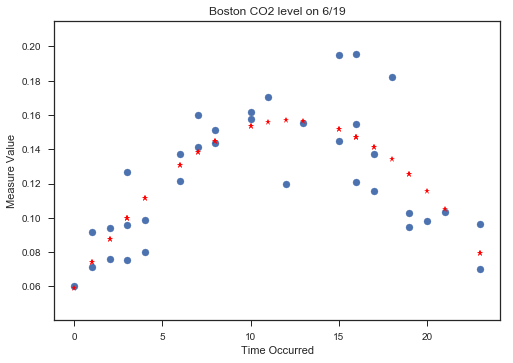

In [74]:
"""Plotting level of CO2 with respect to time for x train and y train predictions"""
plt.scatter(x_train, y_train)
plt.plot(x_train, y_train_pred, 'r*')
plt.ylabel("Measure Value")
plt.xlabel("Time Occurred")
plt.title("Boston CO2 level on 6/19")
plt.show()

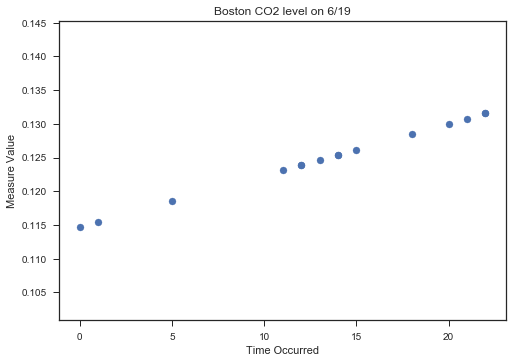

In [63]:
"""Plotting level of CO2 with respect to time for x test and y test predictions"""
plt.scatter(x_test, y_test_pred)
plt.ylabel("Measure Value")
plt.xlabel("Time Occurred")
plt.title("Boston CO2 level on 6/19")
plt.show()

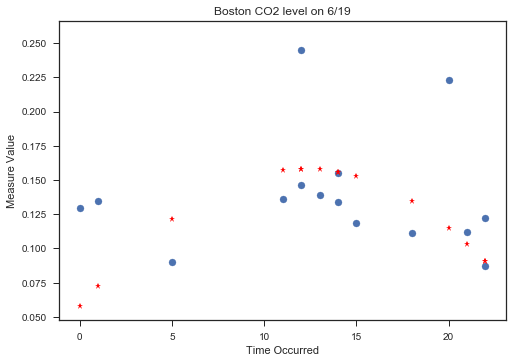

In [46]:
"""Plotting level of CO2 with respect to time for x test and y test"""
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r*')
plt.ylabel("Measure Value")
plt.xlabel("Time Occurred")
plt.title("Boston CO2 level on 6/19")
plt.show()

<h3> Gaussian process for CO data from 6/19 through 6/24 (6 days in a row) </h3>

In [117]:
location = r'/Users/Annamira/Documents/GitHub/TRiCAM_BostonAQ/Boston_AQ_Hourly/'

filenames = ['boston_06_19_CO.csv', 'boston_06_20_CO.csv', 'boston_06_21_CO.csv',
             'boston_06_22_CO.csv', 'boston_06_23_CO.csv', 'boston_06_24_CO.csv']

DFlist = []

for i in range(0,6):
    DF = pd.read_csv(location + filenames[i], engine='python')
    # hold = DF["Sample Collection Start Time"]
    # DF["Sample Collection Start Time"] = hold + 24*i
    DFlist.append(DF)

big_dataframe = pd.concat(DFlist)

In [82]:
big_dataframe

,State Code,County Code,Tribal Code,Site ID,Support Agency Code,Location Address,City Code,Postal Code,Local ID,Local Name,...,Duration Code,Method ID,Measure Unit Code,Sample Collection Start Date,Sample Collection Start Time,Measure Value,Measure Unit,Null Data Code,Qualifier Code,Data Validity Code
0,\t\tMA,'025,NaN,'250250042,'0660,HARRISON AV,7000,'02119,Boston Roxbury,BOSTON,...,1,'593,'007,2017-06-19 10:00:00,10:00:00,0.16174,ppm,NaN,NaN,RAW
1,\t\t\t\tMA,'025,NaN,'250250042,'0660,HARRISON AV,7000,'02119,Boston Roxbury,BOSTON,...,1,'593,'007,2017-06-19 11:00:00,11:00:00,0.17053,ppm,NaN,NaN,RAW
2,\t\t\t\tMA,'025,NaN,'250250042,'0660,HARRISON AV,7000,'02119,Boston Roxbury,BOSTON,...,1,'593,'007,2017-06-19 12:00:00,12:00:00,0.14621,ppm,NaN,NaN,RAW
3,\t\t\t\tMA,'025,NaN,'250250042,'0660,HARRISON AV,7000,'02119,Boston Roxbury,BOSTON,...,1,'593,'007,2017-06-19 13:00:00,13:00:00,0.15513,ppm,NaN,NaN,RAW
4,\t\t\t\tMA,'025,NaN,'250250042,'0660,HARRISON AV,7000,'02119,Boston Roxbury,BOSTON,...,1,'593,'007,2017-06-19 14:00:00,14:00:00,0.15508,ppm,NaN,NaN,RAW
5,\t\t\t\tMA,'025,NaN,'250250042,'0660,HARRISON AV,7000,'02119,Boston Roxbury,BOSTON,...,1,'593,'007,2017-06-19 15:00:00,15:00:00,0.14507,ppm,NaN,NaN,RAW
6,\t\t\t\tMA,'025,NaN,'250250042,'0660,HARRISON AV,7000,'02119,Boston Roxbury,BOSTON,...,1,'593,'007,2017-06-19 16:00:00,16:00:00,0.15494,ppm,NaN,NaN,RAW
7,\t\t\t\tMA,'025,NaN,'250250042,'0660,HARRISON AV,7000,'02119,Boston Roxbury,BOSTON,...,1,'593,'007,2017-06-19 17:00:00,17:00:00,0.13705,ppm,NaN,NaN,RAW
8,\t\t\t\tMA,'025,NaN,'250250042,'0660,HARRISON AV,7000,'02119,Boston Roxbury,BOSTON,...,1,'593,'007,2017-06-19 19:00:00,19:00:00,0.10269,ppm,NaN,NaN,RAW
9,\t\t\t\tMA,'025,NaN,'250250042,'0660,HARRISON AV,7000,'02119,Boston Roxbury,BOSTON,...,1,'593,'007,2017-06-19 20:00:00,20:00:00,0.09832,ppm,NaN,NaN,RAW


In [119]:
times = []
time = list(big_dataframe["Sample Collection Start Time"])

day = 0
prev_T = 09.0

for i in range(len(time)):
    
    T = float(time[i][:2])
    
    if prev_T > T:
        day += 1
        
    times.append(T + day*24)

    prev_T = T

In [122]:
time

['10:00:00',
 '11:00:00',
 '12:00:00',
 '13:00:00',
 '14:00:00',
 '15:00:00',
 '16:00:00',
 '17:00:00',
 '19:00:00',
 '20:00:00',
 '21:00:00',
 '22:00:00',
 '23:00:00',
 '00:00:00',
 '01:00:00',
 '02:00:00',
 '03:00:00',
 '04:00:00',
 '05:00:00',
 '06:00:00',
 '07:00:00',
 '08:00:00',
 '12:00:00',
 '15:00:00',
 '16:00:00',
 '18:00:00',
 '20:00:00',
 '00:00:00',
 '01:00:00',
 '03:00:00',
 '10:00:00',
 '11:00:00',
 '12:00:00',
 '13:00:00',
 '14:00:00',
 '15:00:00',
 '16:00:00',
 '17:00:00',
 '18:00:00',
 '19:00:00',
 '21:00:00',
 '22:00:00',
 '23:00:00',
 '01:00:00',
 '02:00:00',
 '03:00:00',
 '04:00:00',
 '06:00:00',
 '07:00:00',
 '08:00:00',
 '08:00:00',
 '09:00:00',
 '10:00:00',
 '11:00:00',
 '12:00:00',
 '13:00:00',
 '14:00:00',
 '15:00:00',
 '16:00:00',
 '17:00:00',
 '19:00:00',
 '20:00:00',
 '21:00:00',
 '22:00:00',
 '23:00:00',
 '00:00:00',
 '01:00:00',
 '02:00:00',
 '03:00:00',
 '04:00:00',
 '05:00:00',
 '06:00:00',
 '13:00:00',
 '15:00:00',
 '17:00:00',
 '00:00:00',
 '01:00:00',

In [123]:
#This could cause an error with potentially assigning a copy
big_dataframe['Sample Collection Start Time'] = times

In [124]:
"""Splitting into train and test data"""
train, test = train_test_split(big_dataframe, test_size=.30, random_state=0)
x_train = train["Sample Collection Start Time"]
y_train = train["Measure Value"]
x_test = test["Sample Collection Start Time"]
y_test = test["Measure Value"]

In [103]:
y_test.shape

(149,)

In [134]:
"""Simple Gaussian"""

kern = RBF(length_scale = 1)
gp = GaussianProcessRegressor(alpha=0.000885, copy_X_train=False,kernel=kern,n_restarts_optimizer=1, normalize_y=False,optimizer='fmin_l_bfgs_b', random_state=None)
gp.fit(x_train.reshape(347,1), y_train.reshape(347,1))

y_train_pred, sigma_train = gp.predict(x_train.reshape(347,1), return_std=True)
y_test_pred, sigma_test = gp.predict(x_test.reshape(149,1), return_std=True)

#get R^2
r2 = gp.score(x_train.reshape(347,1), y_train.reshape(347,1))
r2_t = gp.score(x_test.reshape(149,1), y_test.reshape(149,1))

#get MSE measurements
MSE_test = np.mean((y_test_pred - y_test.reshape(149,1))**2)
MSE_train = np.mean((y_train_pred - y_train.reshape(347,1))**2)

#get log likelihood
t=gp.log_marginal_likelihood()

#calculate AIC
AIC = 2*len(x_test) - 2*np.log(-t)
print(r2, r2_t)

/Users/Annamira/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/Annamira/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


0.926978783659 0.409518440114


/Users/Annamira/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/Annamira/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/Annamira/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/Annamira/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/Annamira/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/Annamira/anaco

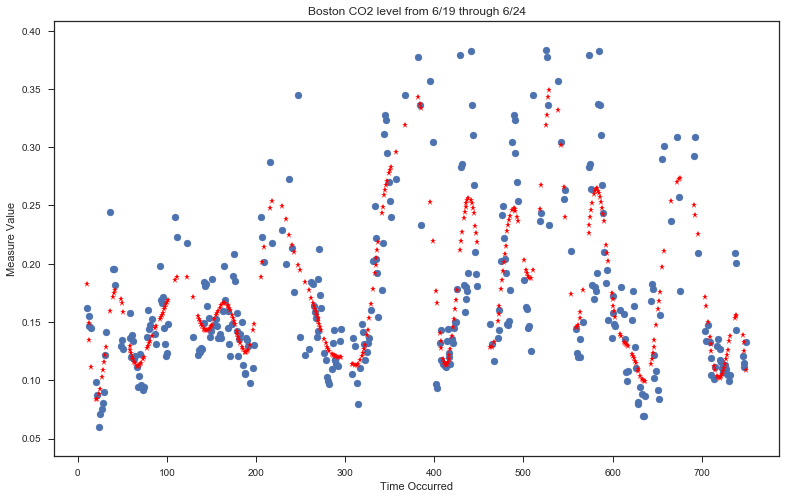

In [130]:
"""Plotting level of CO2 with respect to time for x train and y train"""
plt.figure(figsize=(13,8))
plt.scatter(x_train, y_train)
plt.plot(x_train, y_train_pred, 'r*')
plt.ylabel("Measure Value")
plt.xlabel("Time Occurred")
plt.title("Boston CO2 level from 6/19 through 6/24")
plt.show()